<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/15_1_%EB%A7%88%EC%8A%A4%ED%81%AC_%EC%B0%A9%EC%9A%A9%ED%8C%90%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

마스크 착용여부를 확인하는 모델을 만들어봅시다

https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset'
img_height = 150
img_width = 150

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Train',    
  image_size=(img_height, img_width))

Found 600 files belonging to 2 classes.


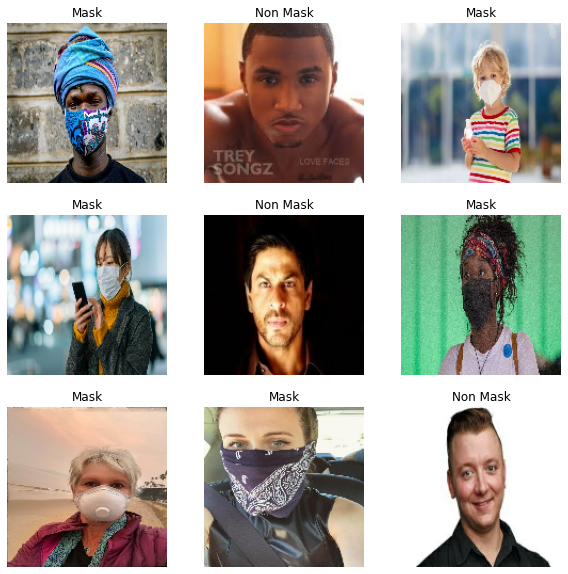

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
imgs = []
for i, l in train_ds.take(1):
  imgs.append(i.numpy())

In [ ]:
imgs

[array([[[[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  3.6064386,   3.6064386,   3.6064386],
          [  3.1582074,   3.1582074,   3.1582074],
          [  1.7728987,   1.7728987,   1.7728987]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.9680051,   0.9680051,   0.9680051],
          [  3.37077  ,   3.37077  ,   3.37077  ],
          [  3.5099885,   3.5099885,   3.5099885]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [ 11.424993 ,  11.424993 ,  11.424993 ],
          [ 14.084055 ,  14.084055 ,  14.084055 ],
          [ 13.134952 ,  13.134952 ,  13.134952 ]],
 
         ...,
 
         [[ 

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Validation',    
  image_size=(img_height, img_width))

Found 306 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Test',    
  image_size=(img_height, img_width))

Found 100 files belonging to 2 classes.


In [ ]:
num_classes = 2
epochs = 10

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,(3,3),padding='SAME',activation='relu'))  # kernel size가 같은 경우는 한개로 써도 됨 (3,3) --> 3
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 64)       

In [ ]:
num_classes = 2
epochs = 10

from tensorflow.keras import layers, models

model2 = models.Sequential()
model2.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model2.add(layers.Conv2D(32,(3,3),padding='SAME',activation='relu'))  # kernel size가 같은 경우는 한개로 써도 됨 (3,3) --> 3
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Conv2D(64,(3,3),padding='SAME',activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [ ]:
test_loss , test_acc = model.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 35s 211ms/step - loss: 0.2505 - acc: 0.8900
test acc :0.8899999856948853 test loss:0.2505381107330322


In [ ]:
test_loss , test_acc = model2.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 210ms/step - loss: 0.3128 - acc: 0.9100
test acc :0.9100000262260437 test loss:0.3127656877040863
